### Read the .csv file

In [1]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
df = pd.read_csv('Student Performance.csv')

### Model 1

<img src="Model 1.jpg" width=500 height=500 />

#### Set up the Feature Matrix and Label Vector:

In [2]:
FEATURE_NAMES = ['math percentage', 'reading score percentage', 'writing score percentage']
LABEL_NAMES = ['group A', 'group B', 'group C', 'group D', 'group E']

In [3]:
# convert these data into 2D numpy array
# order: math percentage, reading score percentage, writing score percentage
X = np.array([[df['math percentage'][0], 
              df['reading score percentage'][0], 
              df['writing score percentage'][0]]], 
             dtype = 'float')
for i in range(1,1000):
    X = np.append(X, [[df['math percentage'][i], 
                  df['reading score percentage'][i], 
                  df['writing score percentage'][i]]],axis=0)
print('feature matrix')
print(X)
print('size: ' + str(X.shape))
print()

# Group A to Group E labeled as 0,1,2,3,4
if(df['race/ethnicity'][0] == 'group A'):
    first_elem = 0
elif(df['race/ethnicity'][0] == 'group B'):
    first_elem = 1
elif(df['race/ethnicity'][0] == 'group C'):
    first_elem = 2
elif(df['race/ethnicity'][0] == 'group D'):
    first_elem = 3
else:
    first_elem = 4
    
y = np.array([first_elem], dtype = 'int')
for i in range(1,1000):
    if(df['race/ethnicity'][i] == 'group A'):
        y = np.append(y, 0)
    elif(df['race/ethnicity'][i] == 'group B'):
        y = np.append(y, 1)
    elif(df['race/ethnicity'][i] == 'group C'):
        y = np.append(y, 2)
    elif(df['race/ethnicity'][i] == 'group D'):
        y = np.append(y, 3)
    else:
        y = np.append(y, 4)
print('Labels')
print(y)
print('size: ' + str(y.shape))

feature matrix
[[0.72 0.72 0.74]
 [0.69 0.9  0.88]
 [0.9  0.95 0.93]
 ...
 [0.59 0.71 0.65]
 [0.68 0.78 0.77]
 [0.77 0.86 0.86]]
size: (1000, 3)

Labels
[1 2 1 0 2 1 1 1 3 1 2 3 1 0 0 2 2 1 2 2 3 1 3 2 3 0 1 2 2 3 3 1 4 3 4 4 3
 3 3 1 2 2 1 1 4 1 0 2 3 2 4 4 2 3 2 2 4 3 3 2 4 0 0 2 3 1 3 2 1 2 3 3 0 2
 2 1 4 0 3 4 1 1 0 4 3 2 2 3 0 3 2 2 2 2 1 2 1 4 3 3 1 3 3 1 2 2 3 4 1 1 3
 2 0 3 4 2 1 3 3 2 2 1 2 3 4 1 1 3 3 0 3 2 4 2 3 2 1 4 2 3 3 2 4 0 3 2 1 2
 3 4 0 0 1 3 3 2 4 1 1 3 1 4 1 2 4 2 2 1 1 2 0 4 3 2 2 2 1 2 1 3 2 2 4 3 2
 2 4 3 1 2 4 3 1 3 2 3 2 4 1 1 2 3 2 1 2 3 4 4 1 1 3 2 2 2 4 1 4 2 1 1 3 1
 2 3 1 4 2 3 0 2 3 2 1 4 2 3 3 3 1 2 3 4 3 4 3 2 4 1 1 2 0 3 1 3 3 4 2 2 1
 2 2 2 2 4 3 3 2 3 3 4 2 2 3 3 1 2 2 4 2 1 3 3 3 3 1 1 4 1 1 4 2 3 2 4 3 1
 0 4 2 3 0 3 2 1 2 0 4 2 1 3 1 1 3 2 2 2 3 2 1 3 2 4 2 2 2 2 2 0 2 1 2 2 4
 1 2 1 3 2 1 3 2 2 1 3 3 2 1 2 3 4 1 4 2 2 2 1 0 2 3 3 1 1 2 3 2 0 2 2 0 3
 4 2 3 3 3 4 3 3 0 0 1 2 2 4 0 4 4 2 3 3 4 3 4 2 2 0 1 2 1 3 2 0 0 3 2 2 1
 1 3 3 3 4 3 1 2 4 2 2

In [4]:
from sklearn.tree import DecisionTreeClassifier

#### Defining (instantiating) an "object" from the sklearn class:

In [5]:
# "my_decisiontree" is instantiated as an "object" of DecisionTreeClassifier "class". 
my_decisiontree = DecisionTreeClassifier()

In [6]:
# Randomly splitting the original dataset into training set and testing set
# The function"train_test_split" from "sklearn.cross_validation" library performs random splitting.
# "test_size=0.3" means that pick 30% of data samples for testing set, and the rest (70%) for training set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

In [7]:
# Training ONLY on the training set:
my_decisiontree.fit(X_train, y_train)

DecisionTreeClassifier()

#### Testing on the testing set:

In [8]:
# Testing on the testing set:
y_predict_dt = my_decisiontree.predict(X_test)
print(y_predict_dt)

[3 2 2 3 3 1 2 3 3 1 1 0 0 1 2 2 1 1 3 3 0 2 1 3 3 3 3 2 1 4 4 4 3 2 3 1 0
 2 1 2 3 2 2 1 2 2 4 4 2 3 3 2 3 4 3 3 3 3 3 3 1 4 3 1 2 4 2 3 1 1 4 3 1 3
 1 2 4 4 4 2 1 3 2 0 0 1 1 1 2 1 3 2 2 1 2 2 3 3 3 4 1 3 2 2 1 1 1 3 2 2 2
 2 3 3 3 1 2 2 3 4 1 4 2 1 3 1 2 2 2 2 3 2 1 4 3 2 1 4 2 3 3 3 4 1 4 4 4 2
 0 4 2 0 2 3 2 1 4 0 1 0 3 1 1 0 4 2 1 2 3 2 3 1 3 1 3 2 2 4 2 4 2 2 3 4 1
 4 2 2 3 1 1 4 3 0 1 1 2 1 2 2 3 4 0 3 3 2 2 2 1 2 2 3 4 0 3 1 2 2 3 2 4 2
 3 3 2 2 2 3 1 3 0 1 2 3 2 1 4 2 3 1 4 4 2 1 3 1 3 0 3 3]


#### Accuracy Evaluation

In [9]:
# We can now compare the "predicted labels" for the Testing Set with its "actual labels" to evaluate the accuracy 
# Function "accuracy_score" from "sklearn.metrics" will perform the element-to-element comparision and returns the 
# portion of correct predictions:

from sklearn.metrics import accuracy_score

score_dt = accuracy_score(y_test, y_predict_dt)
print(score_dt)

0.244


#### Improvement#1 setting the max_depth

In [10]:
# clf means classifier
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, y_train)

In [11]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.316


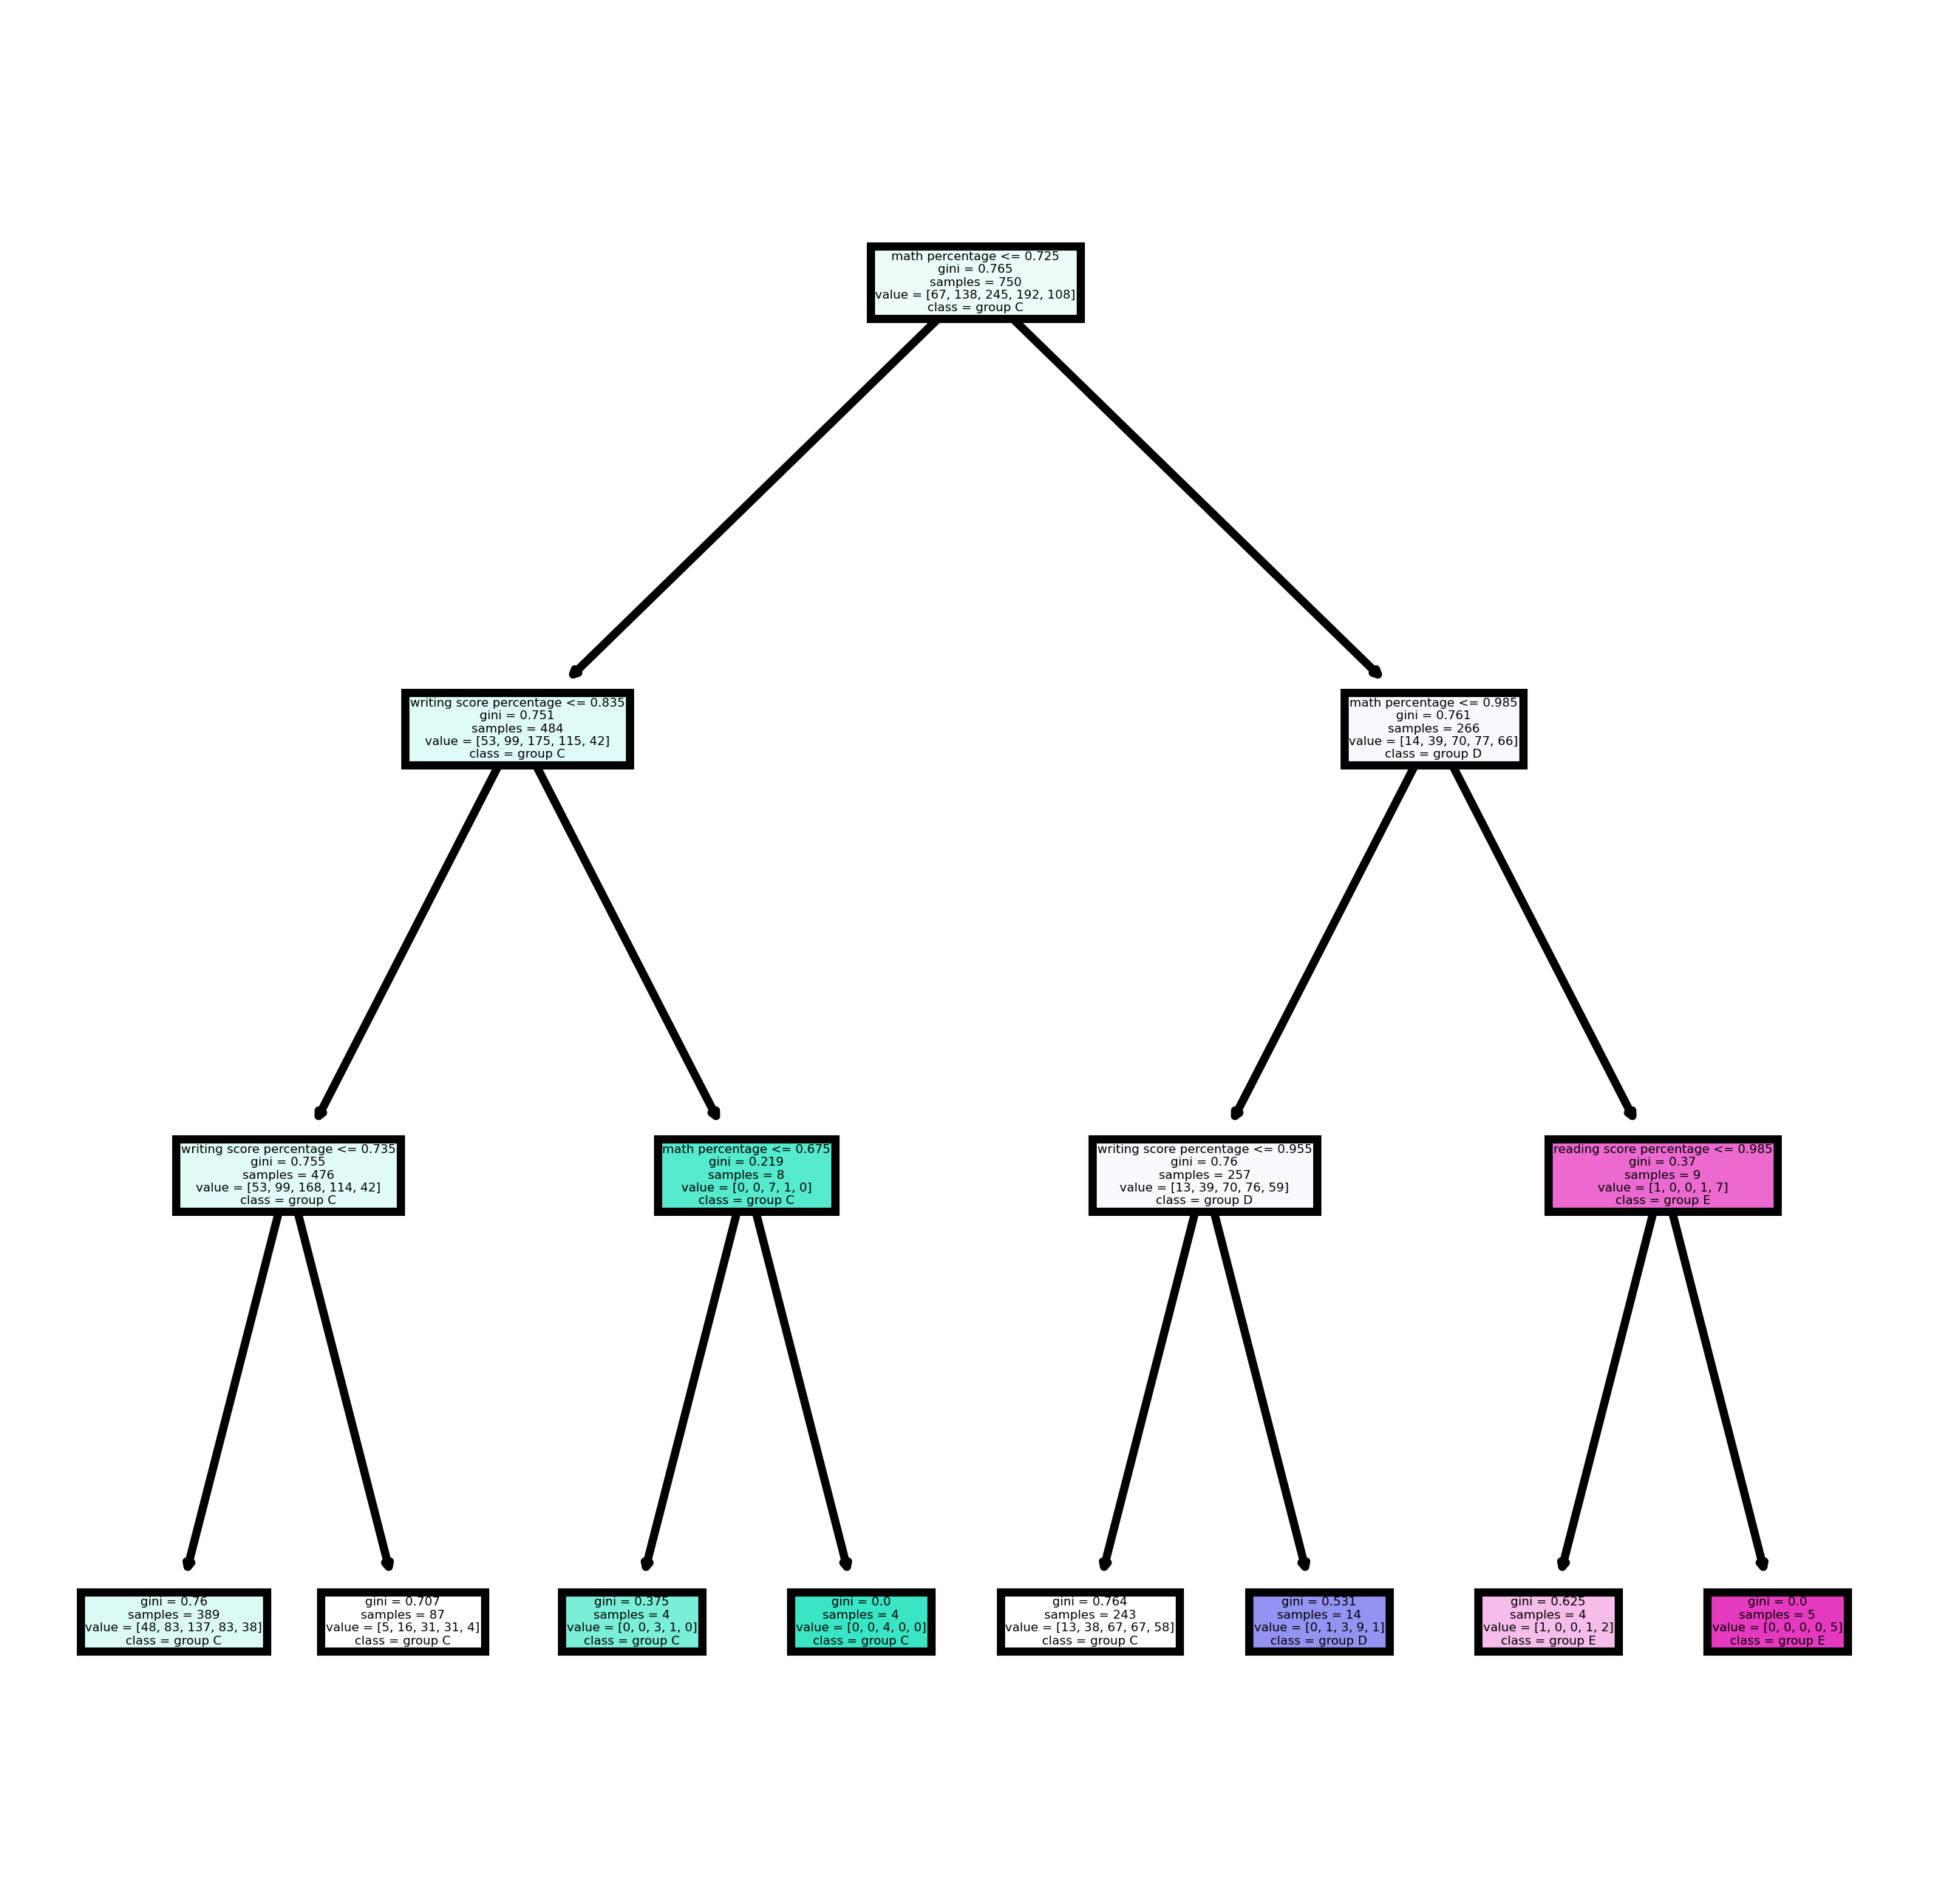

In [12]:
import matplotlib.pyplot as plt

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)

tree.plot_tree(clf,
           feature_names = FEATURE_NAMES, 
           class_names=LABEL_NAMES,
           filled = True);

#### #### Improvement#2 setting the max_depth and entropy
#### referene: https://www.datacamp.com/community/tutorials/decision-tree-classification-python

In [13]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy in entropy score:",metrics.accuracy_score(y_test, y_pred))

Accuracy in entropy score: 0.316


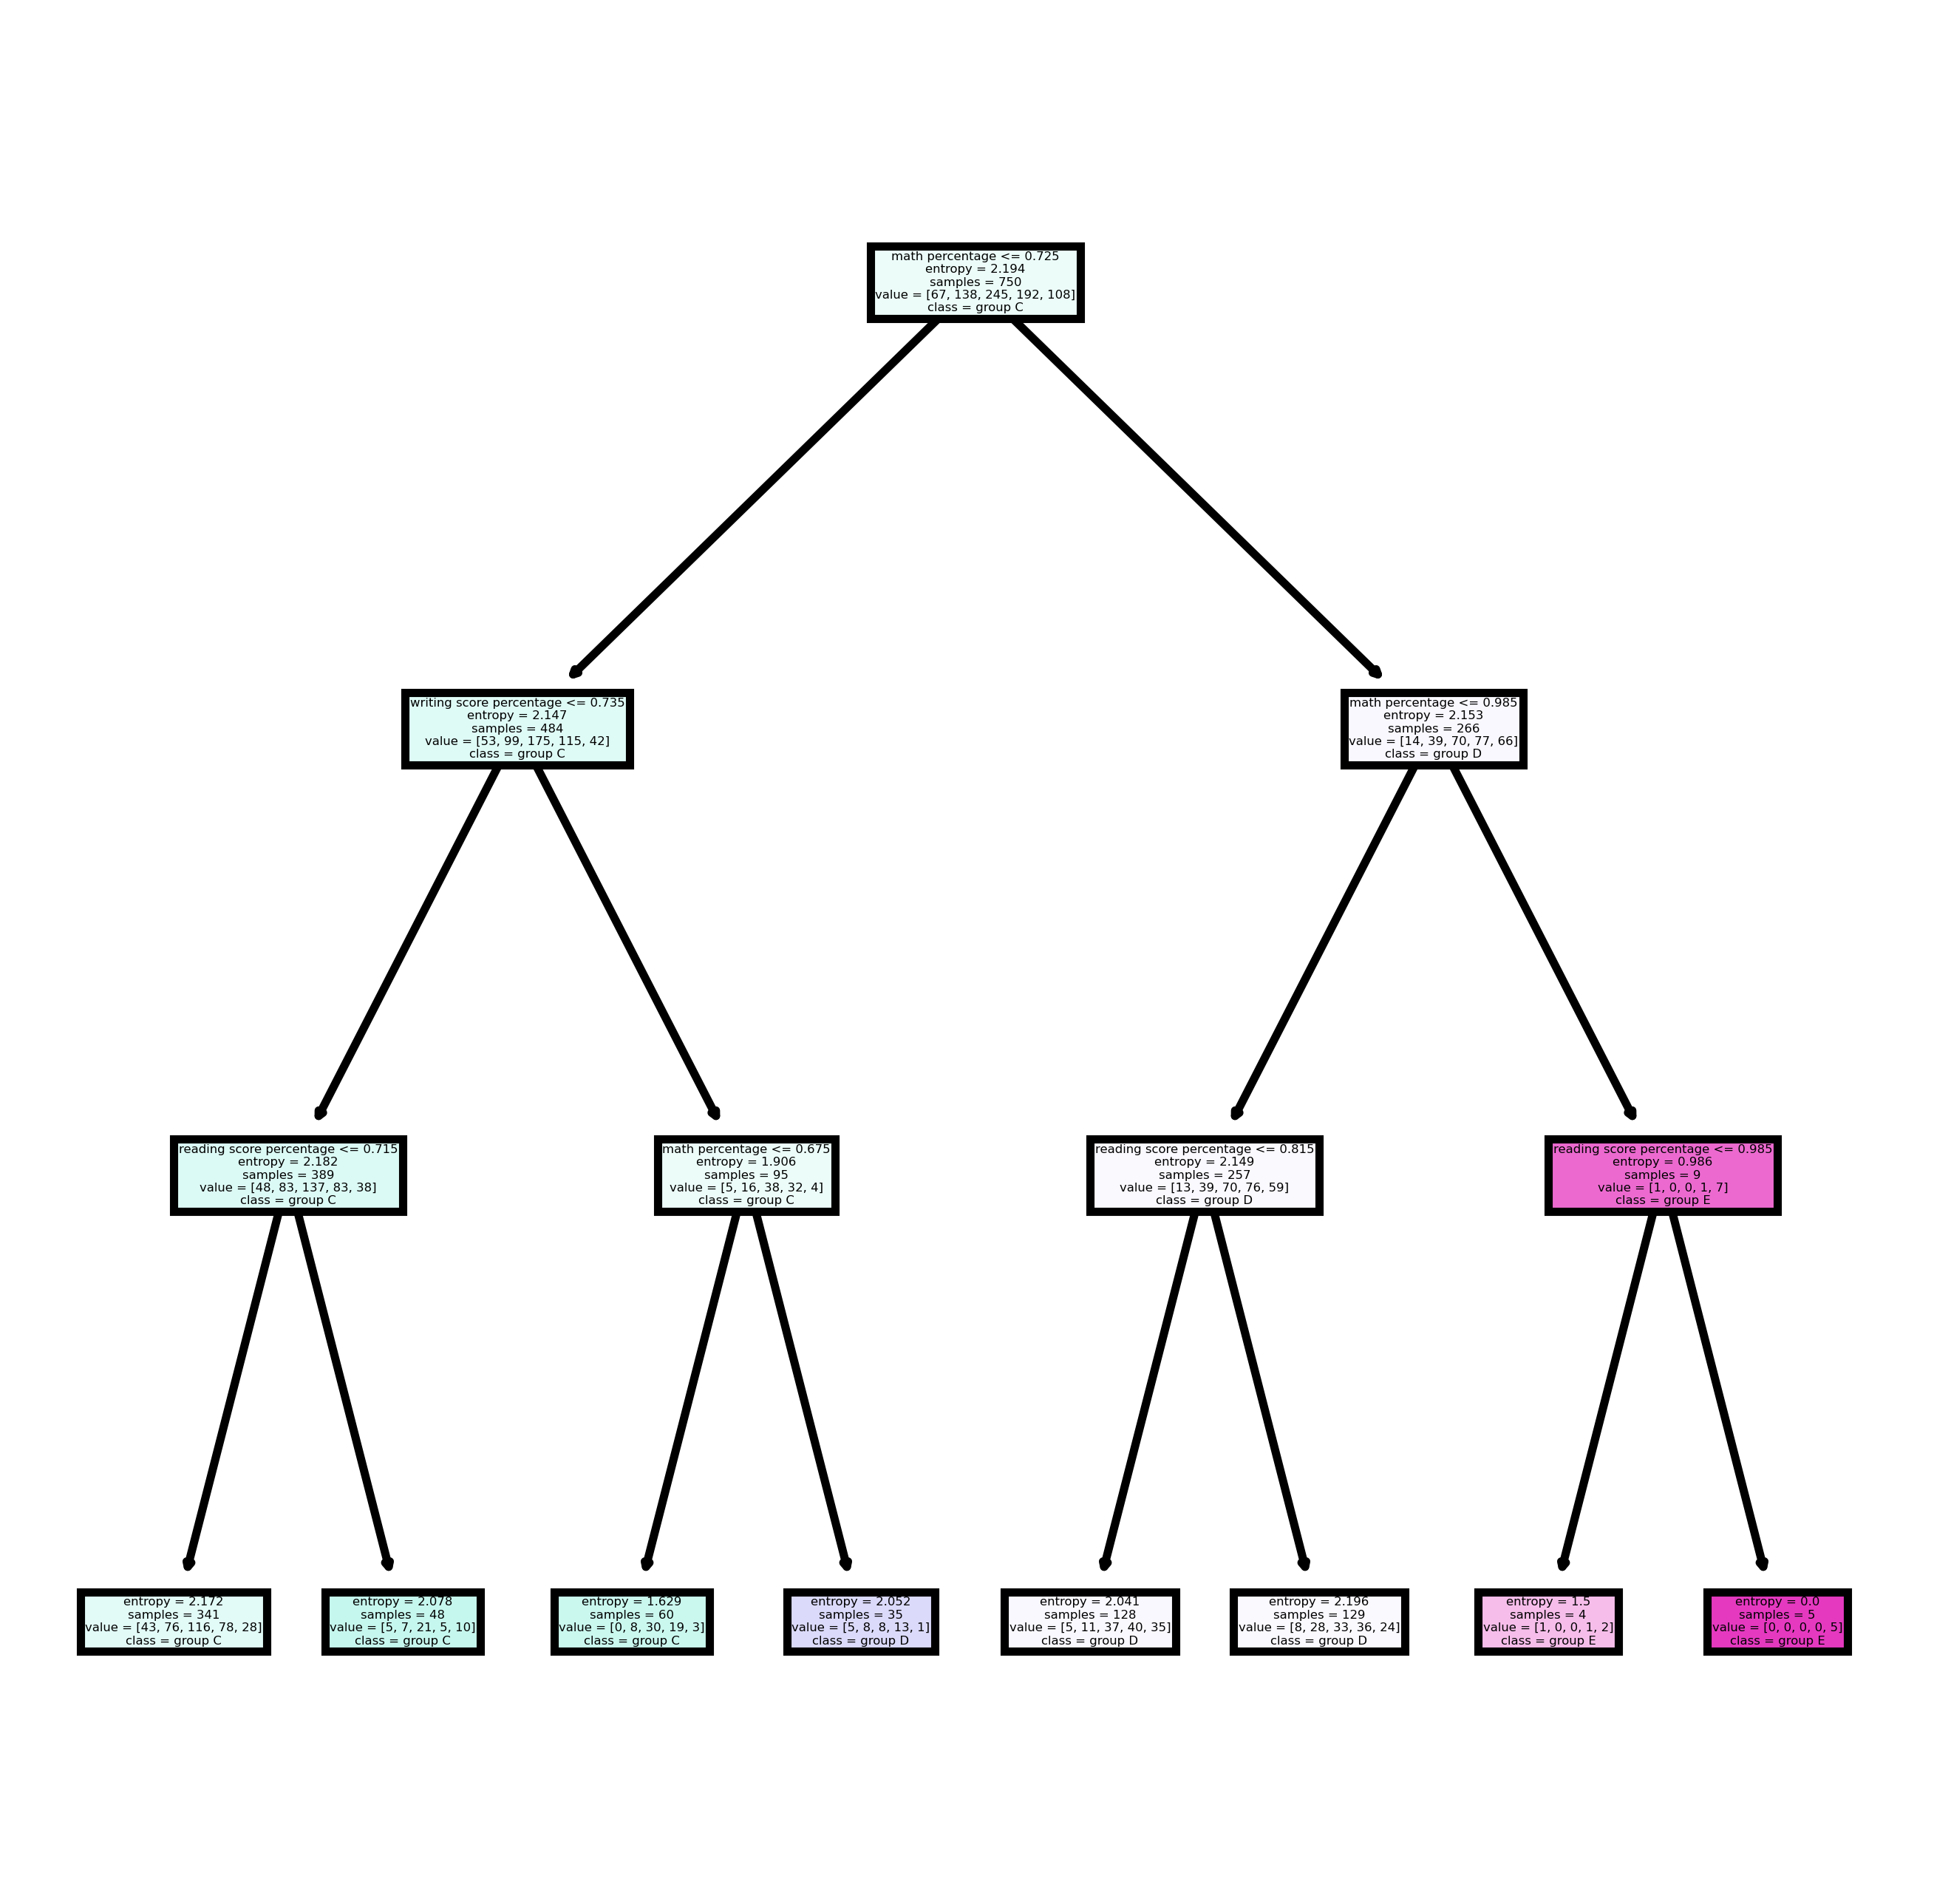

In [14]:
import matplotlib.pyplot as plt

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)

tree.plot_tree(clf,
           feature_names = FEATURE_NAMES, 
           class_names=LABEL_NAMES,
           filled = True);

In [31]:
fig.savefig('model1_dtc.png')

#### Improvement#3 using BootStrap

In [15]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier

prediction_list = list()
bootstarp_size = int(np.floor( 0.8 * len(X_train) ))

for i in range(0, 19):
    
    # Step1 (Bootstrapping)
    X_bag = resample(X_train, n_samples = bootstarp_size , random_state=i , replace = True)
    y_bag = resample(y_train, n_samples = bootstarp_size , random_state=i , replace = True)
    
    # Step2 (Training)
    Base_DecisionTree = DecisionTreeClassifier(random_state=3)
    Base_DecisionTree.fit(X_bag, y_bag)
    
    # Step3 (Base Learner Prediction)
    y_predict = Base_DecisionTree.predict(X_test)
    
    prediction_list.append(y_predict)
    
# Step4 (Voting)
num_of_matches_list = list()
num_of_matches = 0
index = 0

for i in range(0, len(prediction_list)):
    for j in y_test:    
        if j == prediction_list[i][index]:
            num_of_matches += 1
        index += 1
    num_of_matches_list.append(num_of_matches)
    num_of_matches = 0
    index = 0

best = max(num_of_matches_list)
accuracy = best/len(y_test)
print("After the voting, the final decition classifer's accuracy is: " + str(accuracy))

After the voting, the final decition classifer's accuracy is: 0.296


## Conclusion
### DecisionTreeClassifier(): 0.236
### DecisionTreeClassifier(max_depth=3): 0.316
### DecisionTreeClassifier(criterion="entropy", max_depth=3): 0.316
### Bootstrapping & voting in DecisionTreeClassifier(random_state=3): 0.296